In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

%matplotlib inline

In [ ]:
crop = pd.read_csv('/content/Crop_recommendation.csv')
season = pd.read_csv('/content/district wise rainfall normal.csv')
price = pd.read_csv('/content/csv')

In [ ]:
crop.head()



,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
season.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [ ]:
price.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,110000,130000,120000


In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATE_UT_NAME  641 non-null    object 
 1   DISTRICT       641 non-null    object 
 2   JAN            641 non-null    float64
 3   FEB            641 non-null    float64
 4   MAR            641 non-null    float64
 5   APR            641 non-null    float64
 6   MAY            641 non-null    float64
 7   JUN            641 non-null    float64
 8   JUL            641 non-null    float64
 9   AUG            641 non-null    float64
 10  SEP            641 non-null    float64
 11  OCT            641 non-null    float64
 12  NOV            641 non-null    float64
 13  DEC            641 non-null    float64
 14  ANNUAL         641 non-null    float64
 15  Jan-Feb        641 non-null    float64
 16  Mar-May        641 non-null    float64
 17  Jun-Sep        641 non-null    float64
 18  Oct-Dec   

In [ ]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         2238 non-null   object
 1   district      2238 non-null   object
 2   market        2238 non-null   object
 3   commodity     2238 non-null   object
 4   variety       2238 non-null   object
 5   arrival_date  2238 non-null   object
 6   min_price     2238 non-null   int64 
 7   max_price     2238 non-null   int64 
 8   modal_price   2238 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 157.5+ KB


In [ ]:
crop.fillna(0)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
season.fillna(0)

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,KERALA,IDUKKI,13.4,22.1,43.6,150.4,232.6,651.6,788.9,527.3,308.4,343.2,172.9,48.1,3302.5,35.5,426.6,2276.2,564.2
637,KERALA,KASARGOD,2.3,1.0,8.4,46.9,217.6,999.6,1108.5,636.3,263.1,234.9,84.6,18.4,3621.6,3.3,272.9,3007.5,337.9
638,KERALA,PATHANAMTHITTA,19.8,45.2,73.9,184.9,294.7,556.9,539.9,352.7,266.2,359.4,213.5,51.3,2958.4,65.0,553.5,1715.7,624.2
639,KERALA,WAYANAD,4.8,8.3,17.5,83.3,174.6,698.1,1110.4,592.9,230.7,213.1,93.6,25.8,3253.1,13.1,275.4,2632.1,332.5


In [ ]:
price.fillna(0)

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,110000,130000,120000
...,...,...,...,...,...,...,...,...,...
2233,West Bengal,Uttar Dinajpur,Islampur,Potato,Jyoti,04/03/2019,530,570,550
2234,West Bengal,Uttar Dinajpur,Islampur,Rice,Other,04/03/2019,3550,3650,3600
2235,West Bengal,Uttar Dinajpur,Raiganj,Jute,TD-5,04/03/2019,4400,4600,4500
2236,West Bengal,Uttar Dinajpur,Raiganj,Rice,Other,04/03/2019,3450,3550,3500


In [ ]:

data1 = pd.concat([crop, price], axis=0)

In [ ]:
data1.head()

,N,P,K,temperature,humidity,ph,rainfall,label,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data1.fillna(0)

,N,P,K,temperature,humidity,ph,rainfall,label,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice,0,0,0,0,0,0,0.0,0.0,0.0
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice,0,0,0,0,0,0,0.0,0.0,0.0
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice,0,0,0,0,0,0,0.0,0.0,0.0
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice,0,0,0,0,0,0,0.0,0.0,0.0
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice,0,0,0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,West Bengal,Uttar Dinajpur,Islampur,Potato,Jyoti,04/03/2019,530.0,570.0,550.0
2234,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,West Bengal,Uttar Dinajpur,Islampur,Rice,Other,04/03/2019,3550.0,3650.0,3600.0
2235,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,West Bengal,Uttar Dinajpur,Raiganj,Jute,TD-5,04/03/2019,4400.0,4600.0,4500.0
2236,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,West Bengal,Uttar Dinajpur,Raiganj,Rice,Other,04/03/2019,3450.0,3550.0,3500.0


In [ ]:
data = pd.concat([data1,season],axis=0)

In [ ]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label,state,district,...,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5079 entries, 0 to 640
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N              2200 non-null   float64
 1   P              2200 non-null   float64
 2   K              2200 non-null   float64
 3   temperature    2200 non-null   float64
 4   humidity       2200 non-null   float64
 5   ph             2200 non-null   float64
 6   rainfall       2200 non-null   float64
 7   label          2200 non-null   object 
 8   state          2238 non-null   object 
 9   district       2238 non-null   object 
 10  market         2238 non-null   object 
 11  commodity      2238 non-null   object 
 12  variety        2238 non-null   object 
 13  arrival_date   2238 non-null   object 
 14  min_price      2238 non-null   float64
 15  max_price      2238 non-null   float64
 16  modal_price    2238 non-null   float64
 17  STATE_UT_NAME  641 non-null    object 
 18  DISTRICT 

In [ ]:
data.fillna(0)

,N,P,K,temperature,humidity,ph,rainfall,label,state,district,...,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,...,527.3,308.4,343.2,172.9,48.1,3302.5,35.5,426.6,2276.2,564.2
637,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,...,636.3,263.1,234.9,84.6,18.4,3621.6,3.3,272.9,3007.5,337.9
638,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,...,352.7,266.2,359.4,213.5,51.3,2958.4,65.0,553.5,1715.7,624.2
639,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,...,592.9,230.7,213.1,93.6,25.8,3253.1,13.1,275.4,2632.1,332.5


In [ ]:
label_commodity = LabelEncoder()

In [ ]:
data['commodity'] = label_commodity.fit_transform(data['commodity'])

In [ ]:
data['commodity'].value_counts()

156    2841
118     113
147     103
24       99
105      99
       ... 
142       1
126       1
36        1
43        1
115       1
Name: commodity, Length: 157, dtype: int64

In [ ]:
label_label = LabelEncoder()

In [ ]:
data['label'] = label_label.fit_transform(data['label'])

In [ ]:
data['label'].value_counts()

22    2879
7      100
5      100
8      100
6      100
4      100
17     100
16     100
0      100
15     100
21     100
20     100
11     100
1      100
19     100
10     100
2      100
14     100
13     100
18     100
9      100
3      100
12     100
Name: label, dtype: int64

In [ ]:
label_label = LabelEncoder()

In [ ]:
crop['label'] = label_label.fit_transform(crop['label'])

In [ ]:
crop['label'].value_counts()

20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: label, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


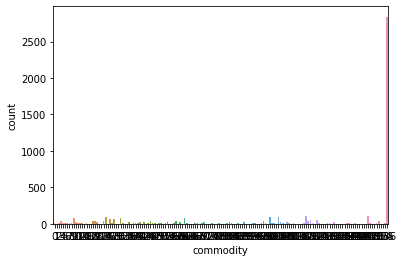

In [ ]:
sns.countplot(data['commodity'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


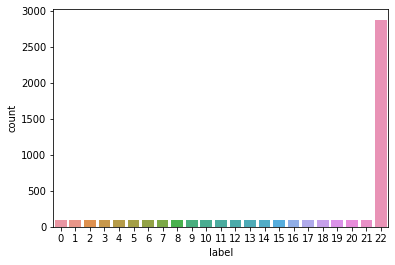

In [ ]:
sns.countplot(data['label'])

In [ ]:
X = crop.drop(['label'], axis = 1)
y = crop['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression
#regressor = regressor.fit(X_train, y_train)
#Y_pred = regressor.predict(X_test)

In [ ]:
sc = StandardScaler()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define the numerical columns
numerical_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]

# Define the categorical columns
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Create the pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('estimator', sc)
])

# Fit and transform the training data
X_train_transformed = pipe.fit_transform(X_train)

# Transform the testing data
X_test_transformed = pipe.transform(X_test)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder()

In [ ]:
encoder.fit(data)

OneHotEncoder()

In [ ]:
numerical_representations = encoder.transform(data)

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      0.80      0.89        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.65      1.00      0.79        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       1.00    

In [ ]:
print(confusion_matrix(y_test, pred_rfc))

[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0 22  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [ ]:
import random 
from sklearn.linear_model import LinearRegression

# Train the model
model = LinearRegression().fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:


from sklearn.tree import DecisionTreeClassifier

# initialize the classifier
clf = DecisionTreeClassifier()

# fit the classifier to the training data
clf.fit(X_train, y_train)

# make predictions on the test data
x_predict = clf.predict(X_test)

# create a dictionary to store the predicted values and original values
predicted_data = {'predicted_values': x_predict, 'original_values': y_test}

# create a Pandas DataFrame and display the first 20 rows
pd.DataFrame(predicted_data).head(20)

,predicted_values,original_values
1451,15,15
1334,21,21
1761,17,17
1735,8,17
1576,0,0
1110,12,12
1594,0,0
530,13,13
651,14,14
819,10,10


In [ ]:
crops = ['rice','maize','chickpea','kidneybeans','pigeonpeas','mothbeans','mungbeans',
         'blackgrams','lentil','pomegranate','banana','mango','grapes','watermelon',
         'muskmelon','apple','orange','papaya','coconut','cotton','jute','coffee']

In [ ]:
clf=DecisionTreeRegressor()

In [ ]:
clf.fit(X_train,y_train)
pred=clf.predict(X_test)

In [ ]:
a=accuracy_score(y_test,pred)
print("The accuracy of this model is: ", a*100)

The accuracy of this model is:  95.22727272727273
